In [1]:
import pandas as pd
import rpy2
from rpy2.robjects import r, pandas2ri

# Note: Combining R and Python in one Python notebook
# does not currently work on the server but should
# work on both macOS and Windows host machines

In [2]:
rpy2.__version__

'3.5.11'

In [3]:
%reload_ext rpy2.ipython

In [4]:
%%R
result <- radiant.design::sample_size_comp(
  type = "proportion",
  p1 = 0.51,
  p2 = 0.52,
  conf_lev = 0.95,
  power = 0.8
)
summary(result)

Sample size calculation for comparison of proportions 
Sample size 1    : 39,208
Sample size 2    : 39,208
Total sample size: 78,416
Proportion 1     : 0.51 
Proportion 2     : 0.52 
Effect size      : 0.02000934 
Confidence level : 0.95 
Power            : 0.8 
Alternative      : two.sided 



In [5]:
dframe = pd.DataFrame({
    "col1": ["x", "y", "z"],
    "col2": [3, 4, 5]
})

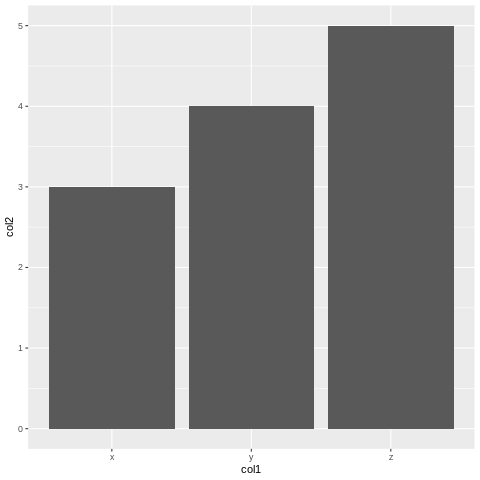

In [6]:
%%R -i dframe
library(ggplot2)
p <- ggplot(dframe, aes(x=col1, y=col2)) + geom_bar(stat="identity")
print(p)


In [7]:
%%R

rdf = data.frame(a = 1:3, b = 4:6)
rdf

  a b
1 1 4
2 2 5
3 3 6


In [8]:
# converts R objects to python types
pandas2ri.activate()

In [9]:
pydf = r['rdf']

In [10]:
pydf

<rpy2.robjects.vectors.DataFrame object at 0xffff51f56f50> [19]
R classes: ('data.frame',)
[IntSexpVector, IntSexpVector]
  a: <class 'rpy2.rinterface.IntSexpVector'>
  <rpy2.rinterface.IntSexpVector object at 0xffff51fde890> [13]
  b: <class 'rpy2.rinterface.IntSexpVector'>
  <rpy2.rinterface.IntSexpVector object at 0xffff51f8f0d0> [13]

In [11]:
type(pydf)

rpy2.robjects.vectors.DataFrame

In [12]:
r.ls()

array(['dframe', 'p', 'rdf', 'result'], dtype='<U6')

For more on connecting passing DataFrames between R and python see:
    
https://pandas.pydata.org/pandas-docs/version/0.23.0/r_interface.html